In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn")

In [26]:
df = yf.download("TSLA", start="2010-01-01", end="2020-04-30")

[*********************100%***********************]  1 of 1 completed


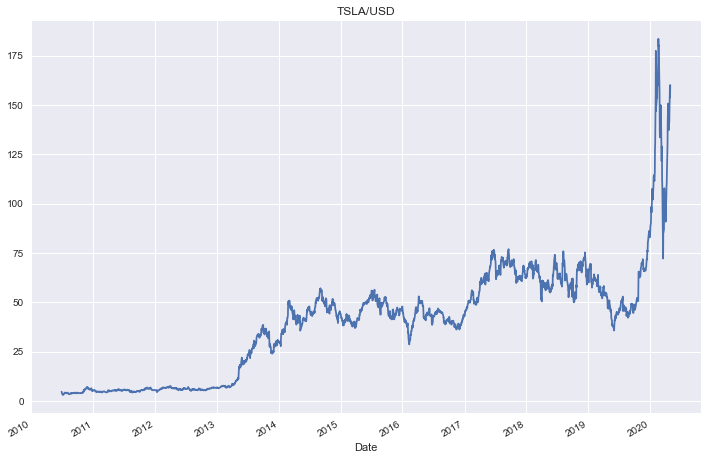

In [27]:
df['Close'].plot(figsize=(12,8), title='TSLA/USD', fontsize=10)

In [28]:
# sma short and long
sma_s = 50
sma_l = 200

In [29]:
df['SMA_S'] = df['Close'].rolling(sma_s).mean()
df['SMA_L'] = df['Close'].rolling(sma_l).mean()

In [35]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA_S,SMA_L,isLong
Date,,,,,,,,,
2011-04-12,5.016000,5.042000,4.860000,4.930000,4.930000,6787000,4.79188,4.74527,1
2011-04-13,5.026000,5.138000,4.962000,4.986000,4.986000,6057500,4.79596,4.74631,1
2011-04-14,4.974000,5.056000,4.840000,5.028000,5.028000,4917000,4.80076,4.74762,1
2011-04-15,5.130000,5.236000,5.082000,5.116000,5.116000,4717500,4.80856,4.75124,1
2011-04-18,5.026000,5.124000,4.872000,5.006000,5.006000,5169500,4.81484,4.75707,1
...,...,...,...,...,...,...,...,...,...
2020-04-23,145.520004,146.800003,140.626007,141.126007,141.126007,66183500,128.26972,83.08725,1
2020-04-24,142.162003,146.145996,139.636002,145.029999,145.029999,66060000,128.10116,83.57348,1
2020-04-27,147.522003,159.897995,147.000000,159.750000,159.750000,103407000,128.08016,84.13363,1


In [31]:
df.dropna(inplace=True)

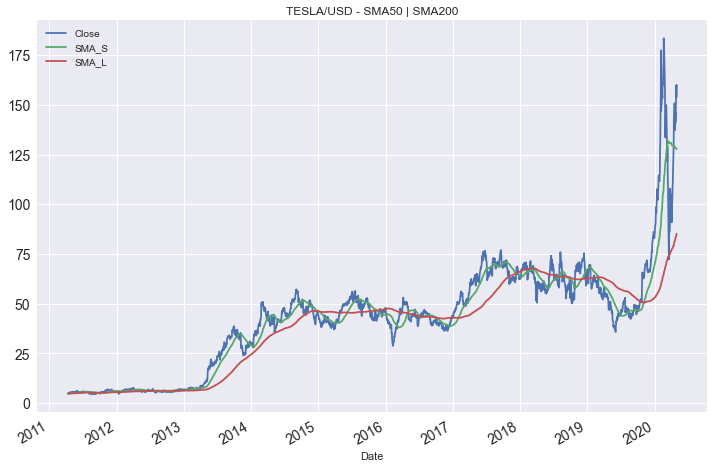

In [32]:
df[['Close', 'SMA_S', 'SMA_L']].plot(figsize=(12,8), 
                                    title='TESLA/USD - SMA{} | SMA{}'.format(sma_s, sma_l),
                                    fontsize=14)
plt.legend()
plt.show()

# Buy and Sell Tickers

In [ ]:
# For long --> buy_long, sell_long
l_buy = []
l_sell = []
flag = 1
for i in range(len(df)):
    if df['SMA_S'][i] > df['SMA_L'][i] and flag==1:
        l_buy.append(df['Close'][i])
        l_sell.append(np.nan)
        flag=-1
    elif df['SMA_S'][i] < df['SMA_L'][i] and flag==-1:
        l_sell.append(df['Close'][i])
        l_buy.append(np.nan)
        flag=1
    else:
        l_buy.append(np.nan)
        l_sell.append(np.nan)


In [88]:
df['l_buy'], df['l_sell'] = l_buy, l_sell

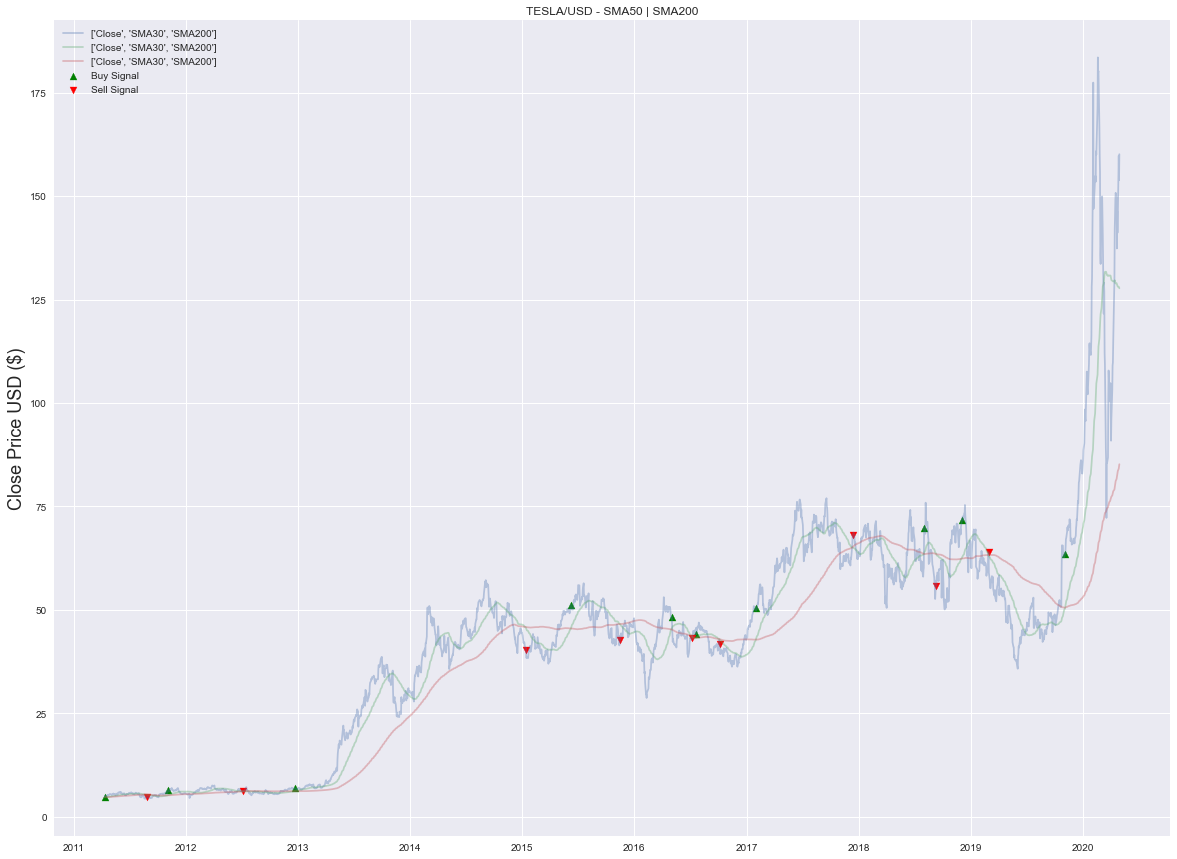

In [94]:
plt.figure(figsize=(20,15))
# Buy and sell tickers
plt.scatter(df.index, df['l_buy'], color='green', label='Buy Signal', marker='^', alpha=1)
plt.scatter(df.index, df['l_sell'], color='red', label='Sell Signal', marker='v', alpha=1)
# Chart
plt.plot(df[['Close', 'SMA_S', 'SMA_L']],  label=['Close', 'SMA30', 'SMA200'], alpha = 0.35)
plt.title('TESLA/USD - SMA{} | SMA{}'.format(sma_s, sma_l))
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()

In [73]:
df["isLong"] = np.where(df["SMA_S"] > df["SMA_L"], 1, -1)

# BackTesting

In [11]:
# Adding returns
df['returns'] = np.log(df['Close'].div(df['Close'].shift(1)))

In [12]:
df['strategy'] = df['isLong'].shift(1) * df['returns']

In [14]:
df.dropna(inplace=True)

# Buy & Hold strategy returns 350% 
# SMA strategy returns ony 100%

In [15]:
df[['returns', 'strategy']].sum()

returns     3.480472
strategy    0.978869
dtype: float64

In [16]:
# Dollar value invested
df[['returns', 'strategy']].sum().apply(np.exp)

returns     32.475053
strategy     2.661444
dtype: float64

In [17]:
# Mean annualised returns 
df[['returns', 'strategy']].mean() * 252

returns     0.385360
strategy    0.108381
dtype: float64

In [18]:
# Annualised risk
df[['returns', 'strategy']].std() * np.sqrt(252)

returns     0.532018
strategy    0.532528
dtype: float64

In [19]:
df['creturns'] = df['returns'].cumsum().apply(np.exp)
df['cstrategy'] = df['strategy'].cumsum().apply(np.exp)

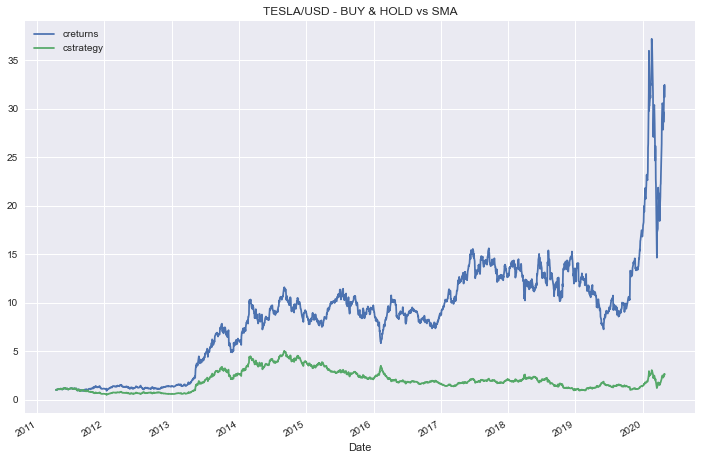

In [20]:
df[['creturns', 'cstrategy']].plot(figsize=(12,8), title="TESLA/USD - BUY & HOLD vs SMA")
plt.legend()
plt.show()

In [47]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA_S,SMA_L,isLong,returns,strategy,creturns,cstrategy
Date,,,,,,,,,,,,,
2011-04-13,5.026000,5.138000,4.962000,4.986000,4.986000,6057500,4.79596,4.74631,1,0.011295,0.011295,1.011359,1.011359
2011-04-14,4.974000,5.056000,4.840000,5.028000,5.028000,4917000,4.80076,4.74762,1,0.008388,0.008388,1.019878,1.019878
2011-04-15,5.130000,5.236000,5.082000,5.116000,5.116000,4717500,4.80856,4.75124,1,0.017351,0.017351,1.037728,1.037728
2011-04-18,5.026000,5.124000,4.872000,5.006000,5.006000,5169500,4.81484,4.75707,1,-0.021736,-0.021736,1.015416,1.015416
2011-04-19,5.052000,5.052000,4.930000,5.032000,5.032000,2743500,4.82320,4.76612,1,0.005180,0.005180,1.020690,1.020690
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-23,145.520004,146.800003,140.626007,141.126007,141.126007,66183500,128.26972,83.08725,1,-0.036840,-0.036840,28.625966,2.345998
2020-04-24,142.162003,146.145996,139.636002,145.029999,145.029999,66060000,128.10116,83.57348,1,0.027287,0.027287,29.417851,2.410895
2020-04-27,147.522003,159.897995,147.000000,159.750000,159.750000,103407000,128.08016,84.13363,1,0.096669,0.096669,32.403652,2.655592


In [52]:
outperf = df['creturns'].iloc[-1] - df['cstrategy'].iloc[-1]

In [55]:
# Buy and hold returns $29.8 on a dollar invested than SMA strategy
outperf

29.813609120532856